# Importing libraries and dataset

In [11]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
# Read dataset
df = pd.read_csv('C:/PFE/TEST/Pokemon.csv',encoding='ISO-8859-1')
# Display first 5 observations
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Seaborn's plotting functions.

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

    The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
    The second way is to directly pass in Series of data to the axes arguments.

For example, let's compare the Attack and Defense stats for our Pokémon:

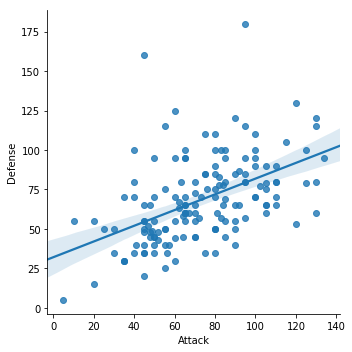

In [12]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

    First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
    Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.


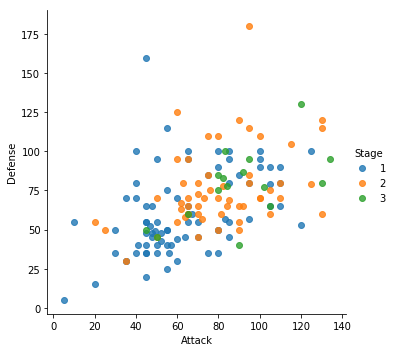

In [13]:

# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Customizing with Matplotlib.

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

    First, invoke your Seaborn plotting function as normal.
    Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

Here's our new scatter plot with sensible axes limits:

(0, 141.9881096001028)

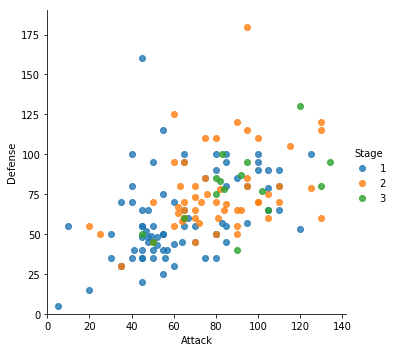

In [15]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# The role of Pandas.

Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

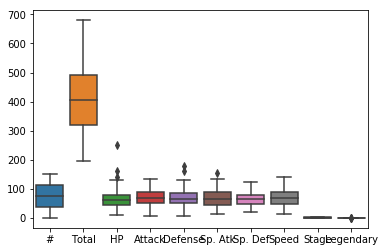

In [16]:
# Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

    We can remove the Total since we have individual stats.
    We can remove the Stage and Legendary columns because they aren't combat stats.

In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:

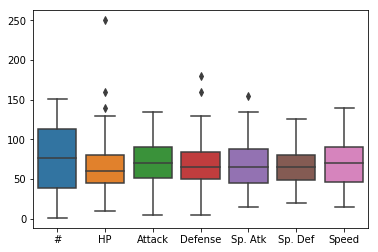

In [18]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

# Seaborn themes

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

    Violin plots are useful alternatives to box plots.
    They show the distribution (through the thickness of the violin) instead of only the summary statistics.

For example, we can visualize the distribution of Attack by Pokémon's primary type:

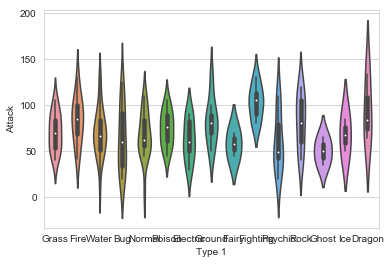

In [21]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=stats_df)

# Color palettes.

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color pale

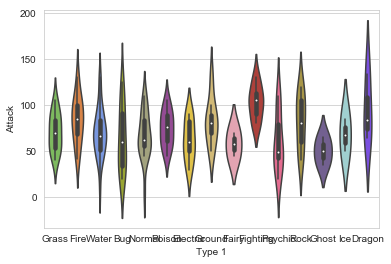

In [25]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

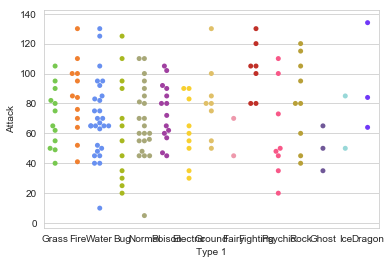

In [26]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

# Overlaying plots

The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

    First, we'll make our figure larger using Matplotlib.
    Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
    Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
    Finally, we'll set a title using Matplotlib.


Text(0.5, 1.0, 'Attack by Type')

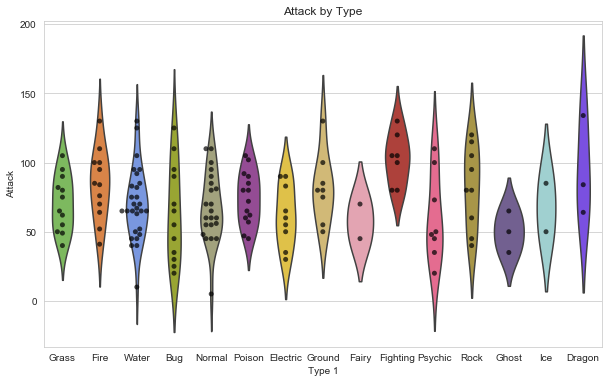

In [28]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [31]:

# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,#,1
1,Ivysaur,Grass,Poison,#,2
2,Venusaur,Grass,Poison,#,3
3,Charmander,Fire,NaN,#,4
4,Charmeleon,Fire,NaN,#,5


In [32]:
print( stats_df.shape )
print( melted_df.shape )

(151, 10)
(1057, 5)


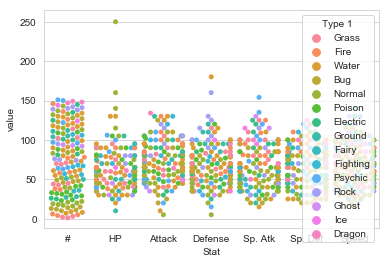

In [33]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

Finally, let's make a few final tweaks for a more readable chart:

    Enlarge the plot.
    Separate points by hue using the argument split=True .
    Use our custom Pokemon color palette.
    Adjust the y-axis limits to end at 0.
    Place the legend to the right.


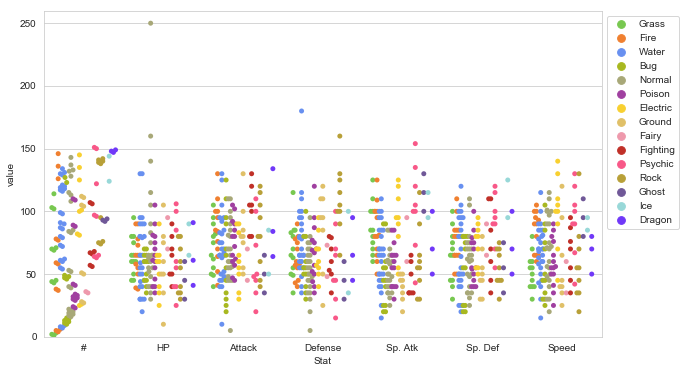

In [35]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Heatmap

Heatmaps help you visualize matrix-like data

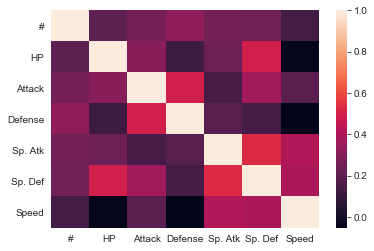

In [37]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

# Histogram

Histograms allow you to plot the distributions of numeric variables.

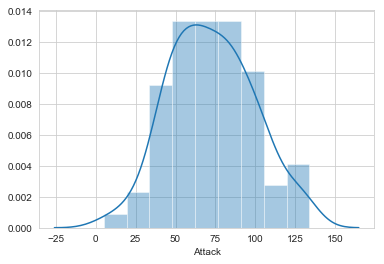

In [39]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

# Bar Plot

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

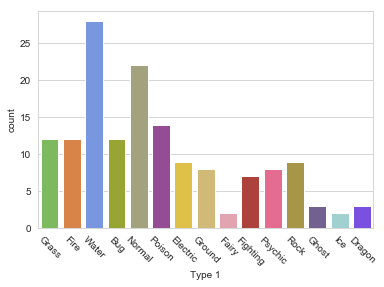

In [40]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Cat Plot

Cat plots make it easy to separate plots by categorical classes

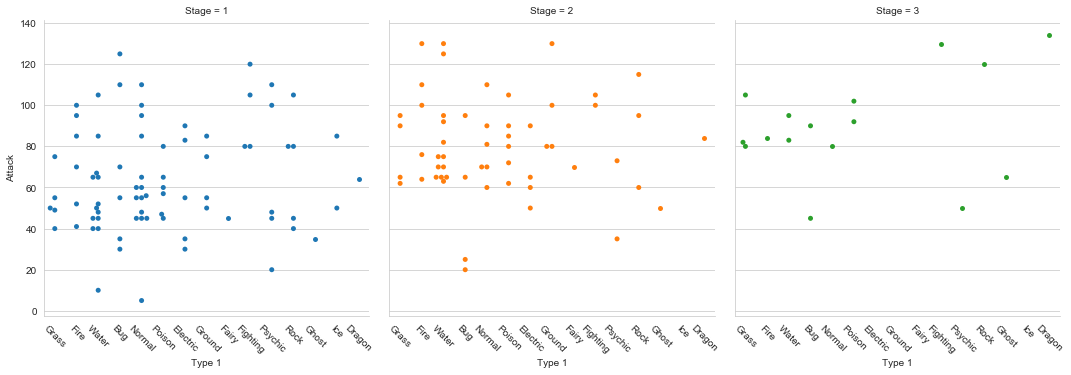

In [43]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# Density Plot

Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot.


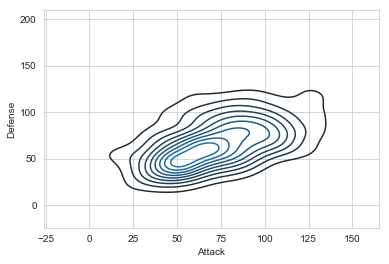

In [45]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

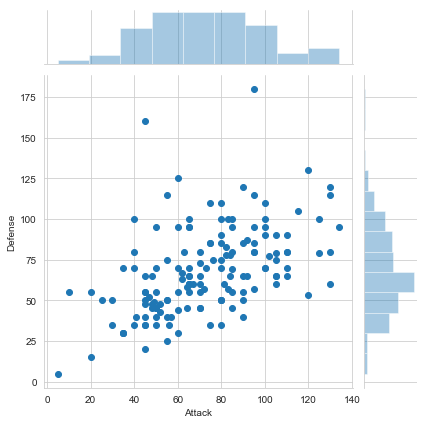

In [46]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

# Congratulations... you've made it to the end of this Python Seaborn tutorial!